In [1]:
%load_ext autoreload
%autoreload 2

In [332]:
import Transactions
import matplotlib.pyplot as plt
from Budget import Budget
from Budgets import Budgets
from pprint import pprint
import datetime
from collections import OrderedDict

In [333]:
all_trxs = Transactions.Transactions.from_csv('2018-01-14_All_Transactions.csv')

In [334]:
bs_expenses_dict = OrderedDict()

# Car
bs_expenses_dict['Car'] = Budgets()
bs_expenses_dict['Car'].add_budget(Budget(-80, ["Auto Insurance"]))
bs_expenses_dict['Car'].add_budget(Budget(-70, ["Gas & Fuel"]))
bs_expenses_dict['Car'].add_budget(Budget(-100, ["Service & Parts"]))
bs_expenses_dict['Car'].add_budget(Budget(-300, ["Vehicle Property Tax"], amount_type='Yearly'))

# Utilities / Monthly Software
bs_expenses_dict['Utilities & Monthly Software'] = Budgets()
bs_expenses_dict['Utilities & Monthly Software'].add_budget(Budget(-130, ["Electricity"]))
bs_expenses_dict['Utilities & Monthly Software'].add_budget(Budget(-56, ["Internet"]))
bs_expenses_dict['Utilities & Monthly Software'].add_budget(Budget(-145, ["Mobile Phone"]))
bs_expenses_dict['Utilities & Monthly Software'].add_budget(Budget(-65, ["Trash/Water"], name="Trash, Water"))
bs_expenses_dict['Utilities & Monthly Software'].add_budget(Budget(-30, ["Natural Gas"]))
bs_expenses_dict['Utilities & Monthly Software'].add_budget(Budget(-35, ["Software Services"], name="Software Servcices"))

# Home
bs_expenses_dict['Home'] = Budgets()
bs_expenses_dict['Home'].add_budget(Budget(-250, ["HOA Fees"]))
bs_expenses_dict['Home'].add_budget(Budget(-120, ["Home Services", "Home Insurance"]))
bs_expenses_dict['Home'].add_budget(Budget(-1365, ["Mortgage & Rent"]))
bs_expenses_dict['Home'].add_budget(Budget(-150, ["Furnishings", "Home Improvement", "Home Supplies"], name="Home Impr_Furn_Supplies"))

# Personal Upkeep
bs_expenses_dict['Personal'] = Budgets()
bs_expenses_dict['Personal'].add_budget(Budget(-66, ["Hair"], name="Hair-Heather"))
bs_expenses_dict['Personal'].add_budget(Budget(-16, ["Hair (Andrew)"], name="Hair-Andrew"))
bs_expenses_dict['Personal'].add_budget(Budget(-25, ["All Medical Expenses"]))
bs_expenses_dict['Personal'].add_budget(Budget(-675, ["Groceries"]))

# Entertainment
bs_expenses_dict['Entertainment'] = Budgets()
bs_expenses_dict['Entertainment'].add_budget(Budget(-150, ["Amusement", "Movies & DVDs"], name="Fun Activities"))
bs_expenses_dict['Entertainment'].add_budget(Budget(-150, ["Restaurants", "Fast Food"], name='Food Out'))
bs_expenses_dict['Entertainment'].add_budget(Budget(-15, ["Coffee Shops"]))
bs_expenses_dict['Entertainment'].add_budget(Budget(-60, ["Food at Work"]))
bs_expenses_dict['Entertainment'].add_budget(Budget(-100, ["Gift"]))
bs_expenses_dict['Entertainment'].add_budget(Budget(-200, ["Sports"]))

# Purchases
bs_expenses_dict['Purchases'] = Budgets()
bs_expenses_dict['Purchases'].add_budget(Budget(-30, ["Books", "Software", "Hobbies"], name="Books, Games, Software"))
bs_expenses_dict['Purchases'].add_budget(Budget(-150, ["Clothing (Heather)"], name="Clothing-Heather"))
bs_expenses_dict['Purchases'].add_budget(Budget(-100, ["Clothing (Andrew)"], name="Clothing-Andrew"))
bs_expenses_dict['Purchases'].add_budget(Budget(-150, ["Electronics Hardware"], name="Electronics, Computers, Tech"))

# Travel
bs_expenses_dict['Travel'] = Budgets()
bs_expenses_dict['Travel'].add_budget(Budget(-800, ["Beach 2017", "Europe Trip 2016", "Vancouver 2017", "Hawaii 2018", "Vacation"], name="Vacations"))
bs_expenses_dict['Travel'].add_budget(Budget(-325, ["Trips Home"]))

# Misc
bs_expenses_dict['Misc'] = Budgets()
bs_expenses_dict['Misc'].add_budget(Budget(-15, ["Tuition"], name="Educational Expenses"))
bs_expenses_dict['Misc'].add_budget(Budget(-20, ["Work Expenses", "Office Supplies"], name="Work, Home Office"))
bs_expenses_dict['Misc'].add_budget(Budget(-20, ["ATM Fee", "Bank Fee", "Fees & Charges", "Finance Charge", "Late Fee"], name="Fees and Charges"))
bs_expenses_dict['Misc'].add_budget(Budget(-50, ["Federal Tax", "Taxes", "State Tax"], name="Taxes"))
bs_expenses_dict['Misc'].add_budget(Budget(-15, ["Passport, License .."], name="Passport, License, etc"))
bs_expenses_dict['Misc'].add_budget(Budget(-15, ["Cash & ATM"], name="Unknown - Cash, etc"))

bs_expenses = Budgets()
for name, bs in bs_expenses_dict.items():
    bs_expenses.add_budgets(bs)
bs_expenses.display()

Auto Insurance            | $-80.00   | ['Auto Insurance']
Gas & Fuel                | $-70.00   | ['Gas & Fuel']
Service & Parts           | $-100.00  | ['Service & Parts']
Vehicle Property Tax      | $-25.00   | ['Vehicle Property Tax']
Electricity               | $-130.00  | ['Electricity']
Internet                  | $-56.00   | ['Internet']
Mobile Phone              | $-145.00  | ['Mobile Phone']
Trash, Water              | $-65.00   | ['Trash/Water']
Natural Gas               | $-30.00   | ['Natural Gas']
Software Servcices        | $-35.00   | ['Software Services']
HOA Fees                  | $-250.00  | ['HOA Fees']
Home Services, Home Insurance | $-120.00  | ['Home Services', 'Home Insurance']
Mortgage & Rent           | $-1365.00 | ['Mortgage & Rent']
Home Impr_Furn_Supplies   | $-150.00  | ['Furnishings', 'Home Improvement', 'Home Supplies']
Hair-Heather              | $-66.00   | ['Hair']
Hair-Andrew               | $-16.00   | ['Hair (Andrew)']
All Medical Expenses      | 

In [335]:
bs_exclude = Budgets()
bs_exclude.add_budget(Budget(0, ['Transfer', 'Investment Transfer', 'Credit Card Payment']))
bs_exclude.add_budget(Budget(0, ['Paycheck', 'Parents and Gifts', "Interest Income", "Unknown Income", "Credit Card Rewards"]))

In [336]:
not_in_bs = bs_expenses.get_transactions_not_in_budgets(all_trxs)
not_in_bs = bs_exclude.get_transactions_not_in_budgets(not_in_bs)
print(len(not_in_bs))
print(not_in_bs)

0
<empty Transactions object>


Saving figure for Auto Insurance as ./test/Auto Insurance
Date range: 2016-01-29 00:00:00 to 2018-01-10 00:00:00
Saving figure for Gas & Fuel as ./test/Gas & Fuel
Date range: 2016-01-29 00:00:00 to 2018-01-10 00:00:00
Saving figure for Service & Parts as ./test/Service & Parts
Date range: 2016-01-29 00:00:00 to 2018-01-10 00:00:00
Saving figure for Vehicle Property Tax as ./test/Vehicle Property Tax
Date range: 2016-01-29 00:00:00 to 2018-01-10 00:00:00
Saving figure for Electricity as ./test/Electricity
Date range: 2016-01-29 00:00:00 to 2018-01-10 00:00:00
Saving figure for Internet as ./test/Internet
Date range: 2016-01-29 00:00:00 to 2018-01-10 00:00:00
Saving figure for Mobile Phone as ./test/Mobile Phone
Date range: 2016-01-29 00:00:00 to 2018-01-10 00:00:00
Saving figure for Trash, Water as ./test/Trash, Water
Date range: 2016-01-29 00:00:00 to 2018-01-10 00:00:00
Saving figure for Natural Gas as ./test/Natural Gas
Date range: 2016-01-29 00:00:00 to 2018-01-10 00:00:00
Saving fi

C:\Users\scribs\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Saving figure for Food at Work as ./test/Food at Work
Date range: 2016-01-29 00:00:00 to 2018-01-10 00:00:00
Saving figure for Gift as ./test/Gift
Date range: 2016-01-29 00:00:00 to 2018-01-10 00:00:00
Saving figure for Sports as ./test/Sports
Date range: 2016-01-29 00:00:00 to 2018-01-10 00:00:00
Saving figure for Books, Games, Software as ./test/Books, Games, Software
Date range: 2016-01-29 00:00:00 to 2018-01-10 00:00:00
Saving figure for Clothing-Heather as ./test/Clothing-Heather
Date range: 2016-01-29 00:00:00 to 2018-01-10 00:00:00
Saving figure for Clothing-Andrew as ./test/Clothing-Andrew
Date range: 2016-01-29 00:00:00 to 2018-01-10 00:00:00
Saving figure for Electronics, Computers, Tech as ./test/Electronics, Computers, Tech
Date range: 2016-01-29 00:00:00 to 2018-01-10 00:00:00
Saving figure for Vacations as ./test/Vacations
Date range: 2016-01-29 00:00:00 to 2018-01-10 00:00:00
Saving figure for Trips Home as ./test/Trips Home
Date range: 2016-01-29 00:00:00 to 2018-01-10 

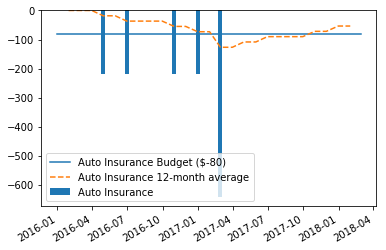

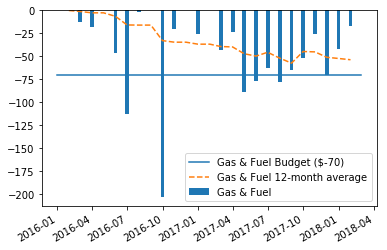

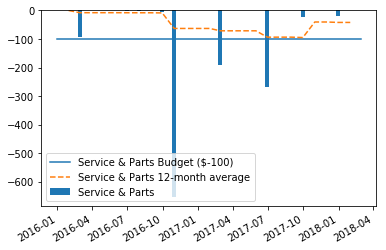

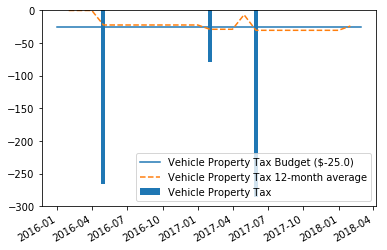

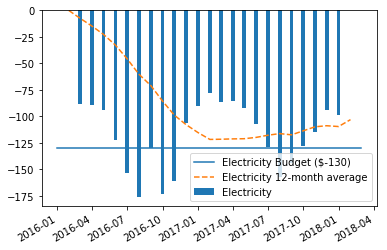

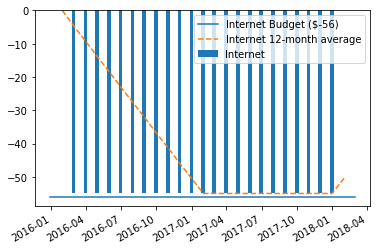

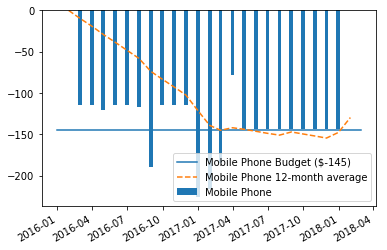

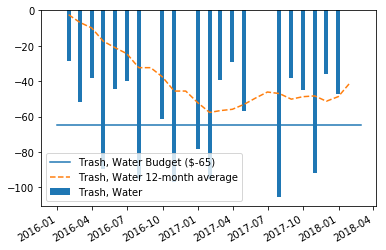

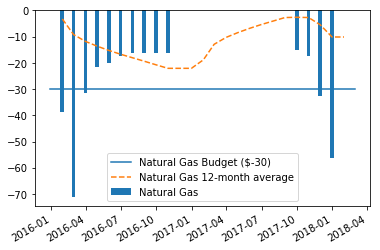

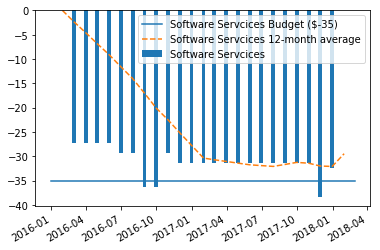

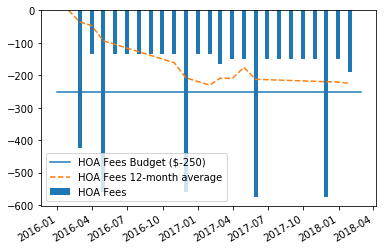

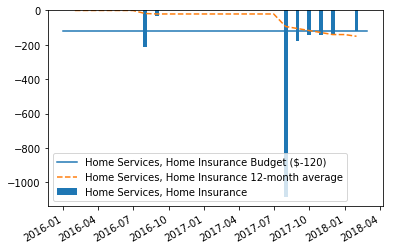

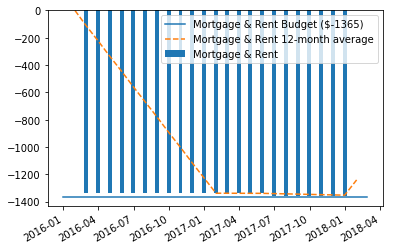

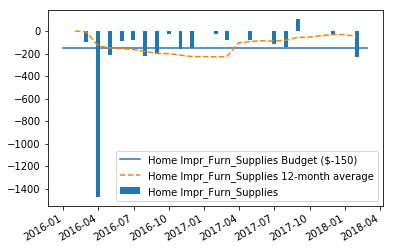

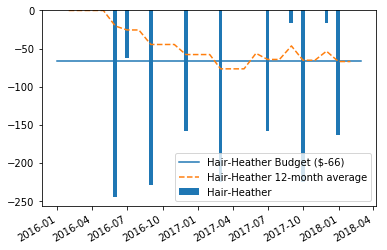

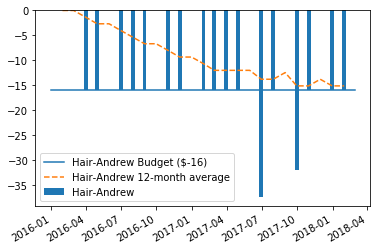

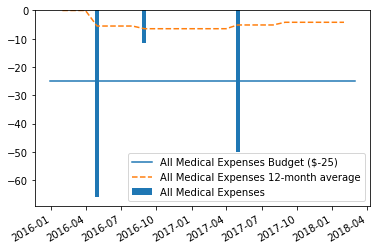

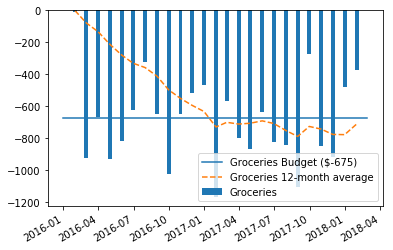

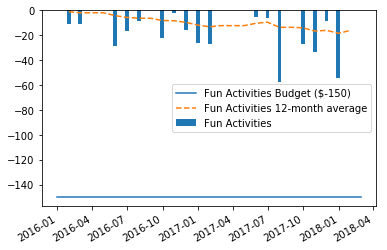

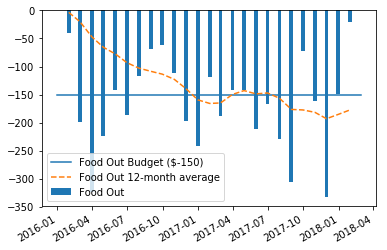

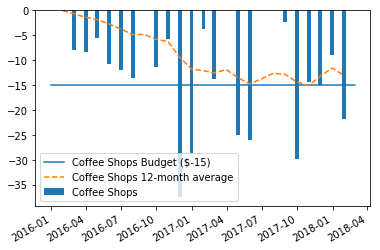

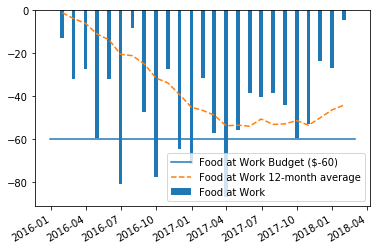

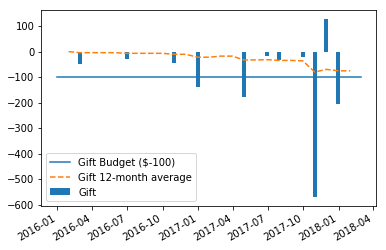

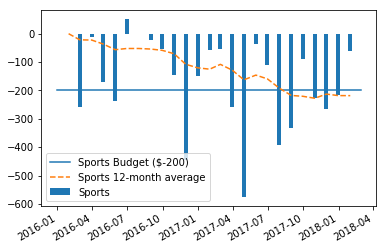

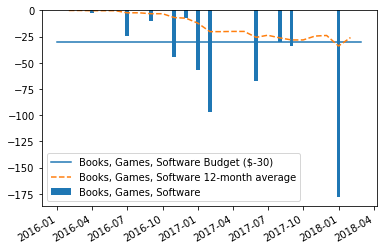

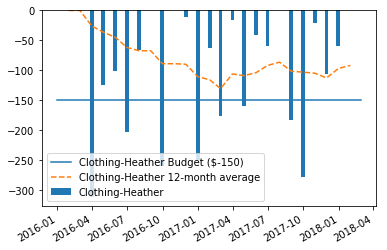

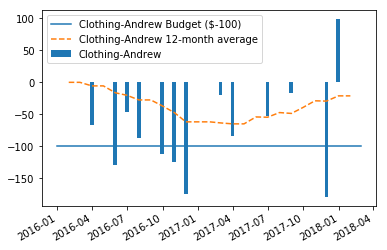

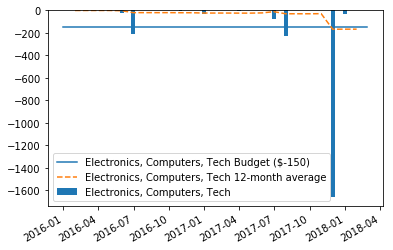

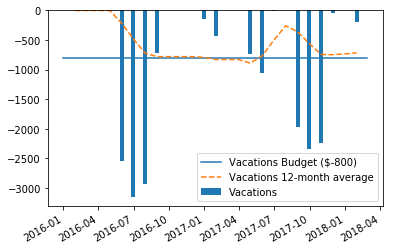

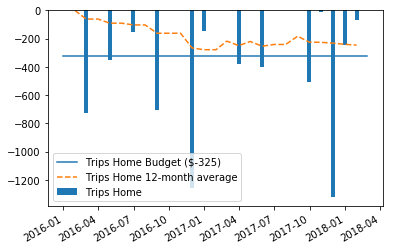

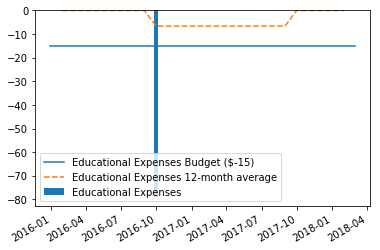

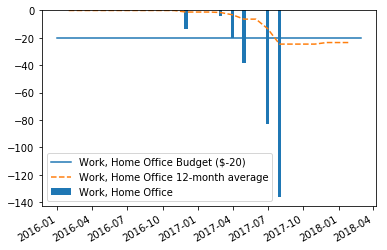

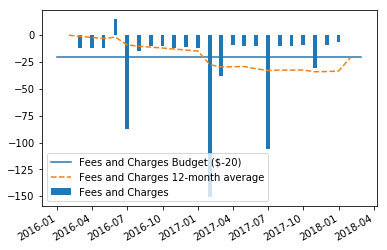

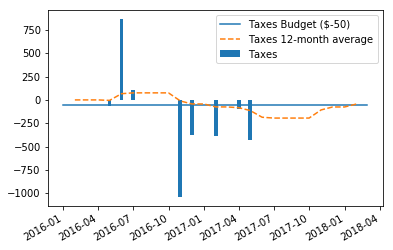

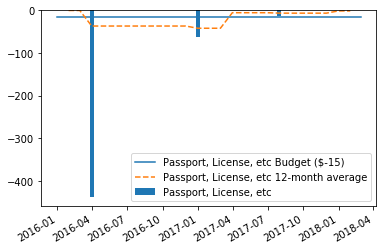

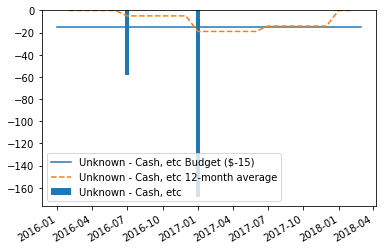

In [364]:
bs_expenses.plot(all_trxs, moving_average=[12], saveloc='./test/')

In [365]:
df = bs_expenses.to_df(all_trxs, moving_average=[12])

In [345]:
df

,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,...,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31
,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Auto Insurance (-80),NaN,NaN,NaN,-139.50,80.00,-139.50,80.00,80.00,80.00,-139.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gas & Fuel (-70),NaN,57.29,52.15,70.00,24.14,-43.14,68.28,70.00,-133.49,49.71,...,-19.02,-6.82,7.24,-8.37,4.63,18.41,44.74,-0.45,28.28,53.39
Service & Parts (-100),NaN,7.00,100.00,100.00,100.00,98.50,98.50,100.00,94.00,-554.22,...,100.00,100.00,-169.98,100.00,100.00,77.50,100.00,100.00,81.78,NaN
Vehicle Property Tax (-25.0),NaN,NaN,NaN,-241.51,25.00,25.00,25.00,25.00,25.00,25.00,...,25.00,-260.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electricity (-130),NaN,42.00,41.00,36.00,8.00,-23.00,-46.00,0.00,-43.00,-31.00,...,38.00,23.00,1.00,-27.00,-14.00,2.00,15.00,36.00,31.00,NaN
Internet (-56),NaN,1.06,1.06,1.06,1.06,1.06,1.06,1.06,1.06,1.06,...,1.06,1.06,1.06,1.06,1.06,1.06,1.06,1.06,1.06,NaN
Mobile Phone (-145),NaN,30.88,30.88,23.90,30.92,30.82,27.57,-44.77,30.21,30.86,...,1.48,1.42,1.42,1.42,1.18,1.18,1.18,1.12,1.12,NaN
"Trash, Water (-65)",36.44,13.05,26.99,-24.83,20.52,25.11,-30.10,65.00,3.45,-32.05,...,8.00,65.00,65.00,-40.41,26.74,20.28,-26.78,28.95,17.98,NaN
Natural Gas (-30),-8.90,-41.16,-1.47,8.34,10.14,12.78,13.87,13.87,13.87,13.87,...,30.00,30.00,30.00,30.00,30.00,15.01,12.74,-2.71,-26.41,NaN


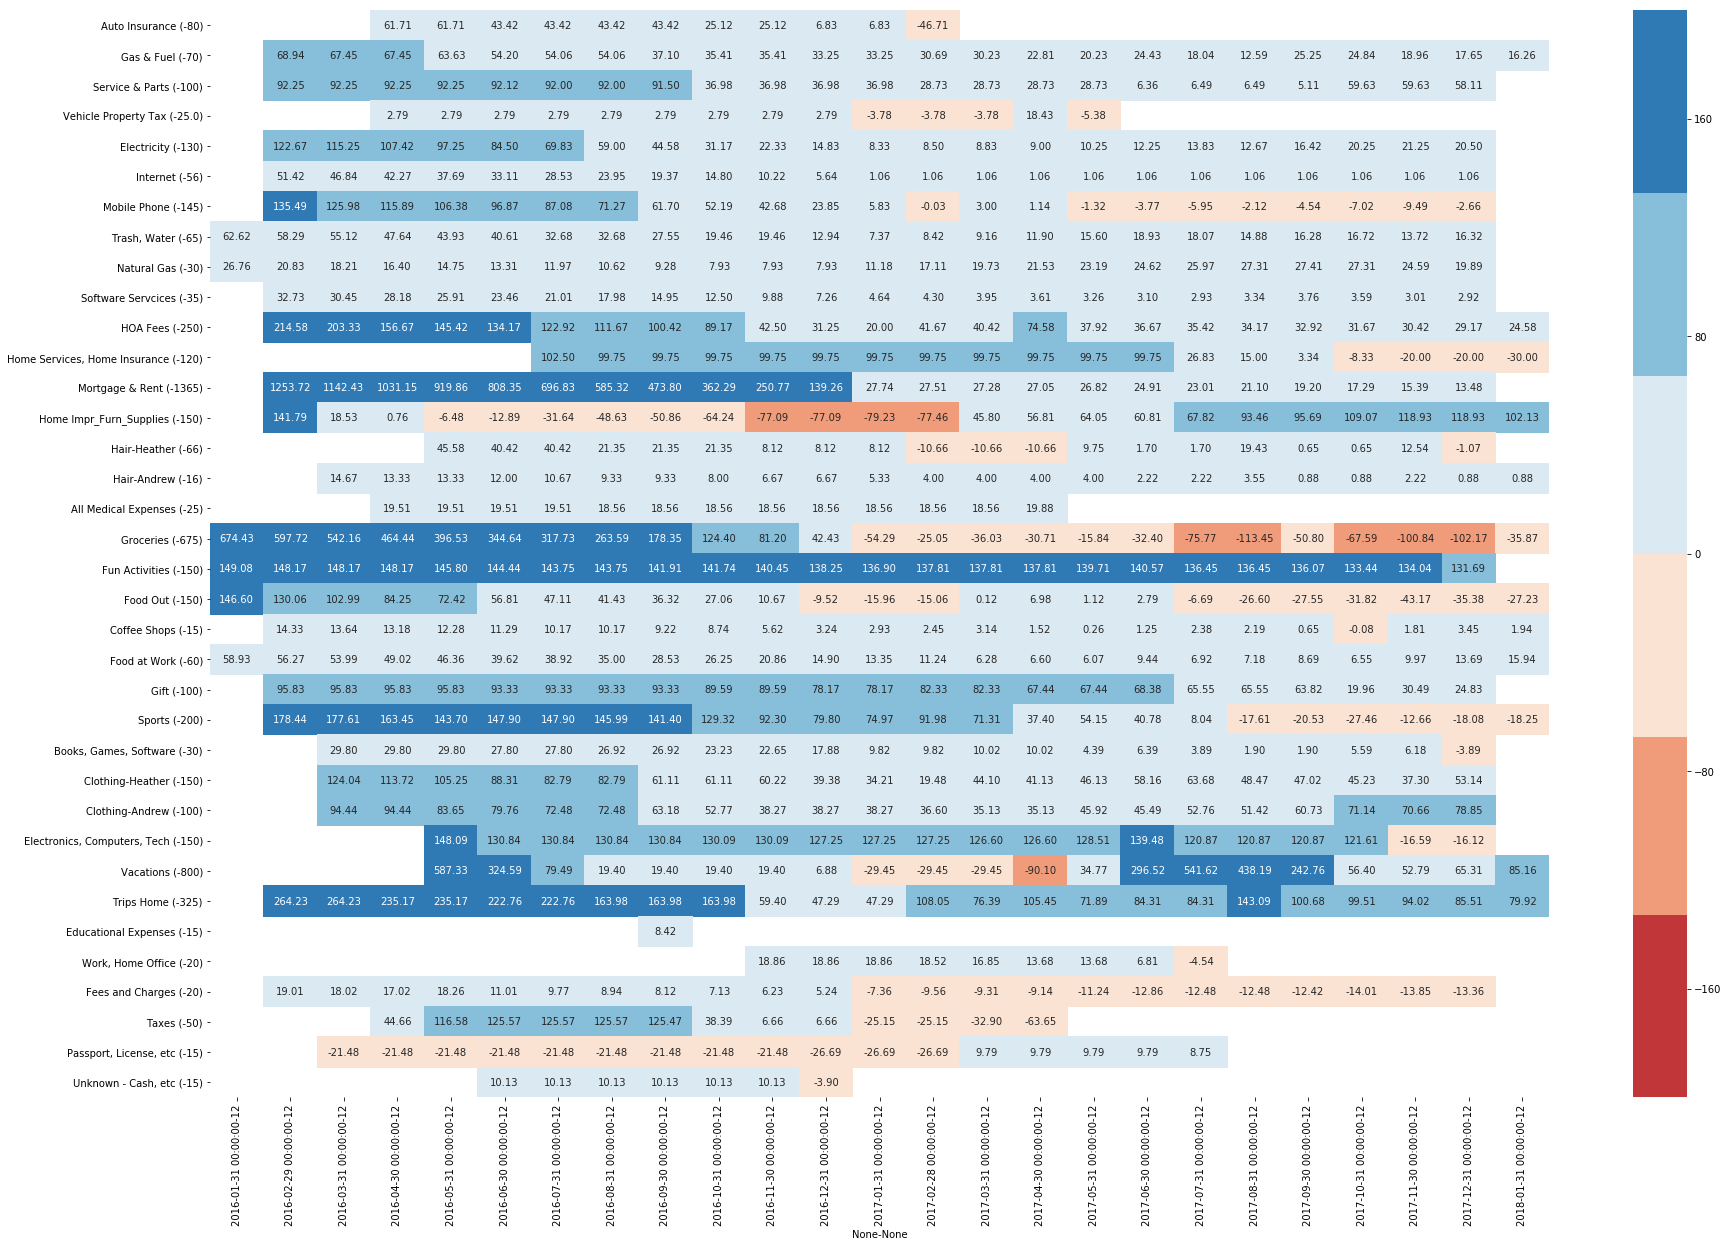

In [366]:
fig, ax = plt.subplots(figsize=(30,20))

sns.heatmap(df, annot=True, ax=ax, fmt='.2f', vmin=-200, vmax=200, center=0, cmap=sns.color_palette("RdBu"), )
fig.savefig('test')

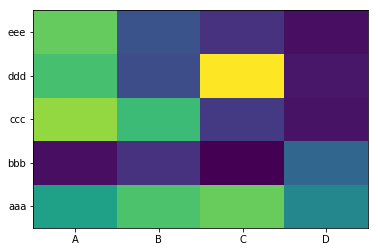

In [196]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt

Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()


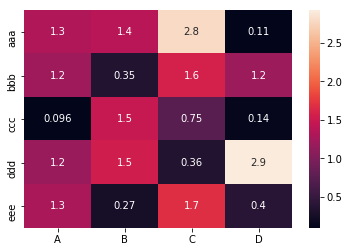

In [197]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

sns.heatmap(df, annot=True)

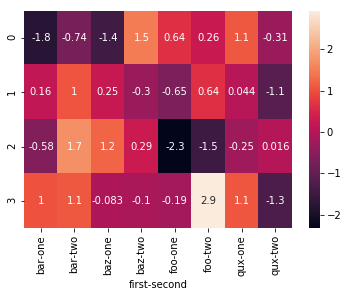

In [202]:
sns.heatmap(df, annot=True)